In [37]:
# import modules
import panel as pn
pn.extension('tabulator')
import pandas as pd
import numpy as np
from panel.template import FastListTemplate
from pathlib import Path
from yahoo_fin.stock_info import get_data
import datetime
from matplotlib.figure import Figure
from matplotlib import cm
%matplotlib inline
import hvplot.pandas
import holoviews as hv
from holoviews import opts


import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

# import modules that help build tabs
import modules.helpers as helpers
import modules.HistoricalData as hst
import modules.MCTab as MCTab
import modules.intro as intro
import modules.profile as prf
import modules.algorithmic_functions as af


import pandas_ta as ta
import yfinance as yf

from sklearn.linear_model import LogisticRegression
from pandas.tseries.offsets import DateOffset
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report


# Compile Data

## * If necessary/desired, use 'build_portfolio_signal_ml_df' to pull machine learning data to create/refresht he test/train datasets

## * Load the test/train datasets

uncomment the below code in order to create or refresh the test/train datasets

In [38]:


# af.create_train_test()

In [39]:
# load X_train_full and X_test_full
X_train_full_conservative = pd.read_csv(Path("./data/X_train_full_conservative.csv"), index_col="Unnamed: 0", parse_dates=True, infer_datetime_format=True)
X_test_full_conservative = pd.read_csv(Path("./data/X_test_full_conservative.csv"), index_col="Unnamed: 0", parse_dates=True, infer_datetime_format=True)


# create additional X_train/test datasets with subsets of indicators
X_train_sma_conservative = X_train_full_conservative[['SMA_30', 'SMA_100']]
X_test_sma_conservative = X_test_full_conservative[['SMA_30', 'SMA_100']]
X_train_macd_conservative = X_train_full_conservative[['MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9']]
X_test_macd_conservative = X_test_full_conservative[['MACD_12_26_9', 'MACDh_12_26_9','MACDs_12_26_9']]
X_train_bb_conservative = X_train_full_conservative[['BBL_20_2.0','BBM_20_2.0','BBU_20_2.0','BBB_20_2.0','BBP_20_2.0']]
X_test_bb_conservative = X_test_full_conservative[['BBL_20_2.0','BBM_20_2.0','BBU_20_2.0','BBB_20_2.0','BBP_20_2.0']]
X_train_rsi_conservative = X_train_full_conservative[['RSI_14']]
X_test_rsi_conservative = X_test_full_conservative[['RSI_14']]
X_train_hlc3_conservative = X_train_full_conservative[['HLC3']]
X_test_hlc3_conservative = X_test_full_conservative[['HLC3']]
X_train_ohl4_conservative = X_train_full_conservative[['OHLC4']]
X_test_ohl4_conservative = X_test_full_conservative[['OHLC4']]
X_train_rsi_conservative = X_train_full_conservative[['RSI_14']]
X_test_rsi_conservative = X_test_full_conservative[['RSI_14']]
X_train_lr_conservative = X_train_full_conservative[['LR_14']]
X_test_l_conservativer = X_test_full_conservative[['LR_14']]
X_train_stoch_conservative = X_train_full_conservative[['STOCHk_14_3_3', 'STOCHd_14_3_3']]
X_test_stoch_conservative = X_test_full_conservative[['STOCHk_14_3_3', 'STOCHd_14_3_3']]


#load y_train and y_test
y_train_conservative = pd.read_csv(Path("./data/y_train_conservative.csv"), index_col="Unnamed: 0", parse_dates=True, infer_datetime_format=True)
y_test_conservative = pd.read_csv(Path("./data/y_test_conservative.csv"), index_col="Unnamed: 0", parse_dates=True, infer_datetime_format=True)


## Create model

### initialize standard scaler

In [40]:
scaler = StandardScaler()

### Initialize logistic regression models for training and subsequent evaluation/comparison

In [41]:
model1 = LogisticRegression(random_state=42, max_iter=10000, solver='saga', penalty='elasticnet', l1_ratio=0.1)
model2 = LogisticRegression(random_state=42, max_iter=10000, solver='saga', penalty='elasticnet', l1_ratio=0.3)
model3 = LogisticRegression(random_state=42, max_iter=10000, solver='saga', penalty='elasticnet', l1_ratio=0.5)
model4 = LogisticRegression(random_state=42, max_iter=10000, solver='saga', penalty='elasticnet', l1_ratio=0.7)
model5 = LogisticRegression(random_state=42, max_iter=10000, solver='saga', penalty='elasticnet', l1_ratio=0.9)
model6 = LogisticRegression(random_state=42, max_iter=10000, solver='saga', penalty='l1')
model7 = LogisticRegression(random_state=42, max_iter=10000, solver='saga', penalty=None)
model8 = LogisticRegression(random_state=42, max_iter=10000, solver='lbfgs', penalty=None)
model9 = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear', penalty='l1')
model10 = LogisticRegression(random_state=42, max_iter=10000, solver='liblinear', penalty='l2')
model11 = LogisticRegression(random_state=42, max_iter=10000, solver='sag', penalty=None)


### Setup model pipeline, consisting of data scaling and the model training/fitting
will fit/evaluate multiple models using a series of for-loops <br>
models will be built using all indicators at once, just SMA inidcators, just MACD indicators, and just Bollinger Band indicators

In [42]:
# create list of defined models that can be looped through for fit/evaluation
models = [model1, model2, model3, model4, model5, model6, model7, model8, model9, model10, model11]

## fitting and evaluating model for Conservative portfolio. 

In [43]:
### Fit/Evaluate model with all indicators

i = 1
df_full_results = pd.DataFrame()
for model in models:
    pipeline = Pipeline([('scaler', scaler), ('lr', model)])
    pipeline.fit(X_train_full_conservative, y_train_conservative)
    preds = pipeline.predict(X_test_full_conservative)
    report = classification_report(y_test_conservative, preds, output_dict=True)
    df = pd.DataFrame.from_dict(report['weighted avg'], orient='index', columns=[f'model{i}'])
    df.loc['accuracy',f'model{i}'] = report['accuracy']
    df_full_results = pd.concat([df_full_results, df], axis=1)
    df_full_results.drop('support', inplace=True)
    i += 1

### Fit/Evaluate model with only SMA indicators

i = 1
df_sma_results = pd.DataFrame()
for model in models:
    pipeline = Pipeline([('scaler', scaler), ('lr', model)])
    pipeline.fit(X_train_sma_conservative, y_train_conservative)
    preds = pipeline.predict(X_test_sma_conservative)
    report = classification_report(y_test_conservative, preds, output_dict=True)
    df = pd.DataFrame.from_dict(report['weighted avg'], orient='index', columns=[f'model{i}'])
    df.loc['accuracy',f'model{i}'] = report['accuracy']
    df_sma_results = pd.concat([df_sma_results, df], axis=1)
    df_sma_results.drop('support', inplace=True)
    i += 1

### Fit/Evaluate model with only MACD indicators

i = 1
df_macd_results = pd.DataFrame()
for model in models:
    pipeline = Pipeline([('scaler', scaler), ('lr', model)])
    pipeline.fit(X_train_macd_conservative, y_train_conservative)
    preds = pipeline.predict(X_test_macd_conservative)
    report = classification_report(y_test_conservative, preds, output_dict=True)
    df = pd.DataFrame.from_dict(report['weighted avg'], orient='index', columns=[f'model{i}'])
    df.loc['accuracy',f'model{i}'] = report['accuracy']
    df_macd_results = pd.concat([df_macd_results, df], axis=1)
    df_macd_results.drop('support', inplace=True)
    i += 1


### Fit/Evaluate model with only Bollinger Bands indicators

i = 1
df_bb_results = pd.DataFrame()
for model in models:
    pipeline = Pipeline([('scaler', scaler), ('lr', model)])
    pipeline.fit(X_train_bb_conservative, y_train_conservative)
    preds = pipeline.predict(X_test_bb_conservative)
    report = classification_report(y_test_conservative, preds, output_dict=True)
    df = pd.DataFrame.from_dict(report['weighted avg'], orient='index', columns=[f'model{i}'])
    df.loc['accuracy',f'model{i}'] = report['accuracy']
    df_bb_results = pd.concat([df_bb_results, df], axis=1)
    df_bb_results.drop('support', inplace=True)
    i += 1

### combine all results into one table for comparison

df_bb_results['type'] = 'bb'
df_macd_results['type'] = 'macd'
df_sma_results['type'] = 'sma'
df_full_results['type'] = 'full'

results = pd.concat([df_bb_results, df_macd_results, df_sma_results, df_full_results], axis=0)
results.set_index('type', append=True, inplace=True)
results_conservative = results.reorder_levels(['type', 0])
# results_conservative

### View evaluation metrics for each model and portfolio class

In [44]:
import seaborn as sns

In [45]:
cm = sns.light_palette("blue", as_cmap=True)
results_conservative.style.background_gradient(cmap=cm, axis=1).set_caption("conservative")

In [88]:
signals, _ = af.build_portfolio_signal_ml_df("conservative", 2017,12,31)

In [89]:
pipeline = Pipeline([('scaler', scaler), ('lr', model1)])
pipeline.fit(X_train_full_conservative, y_train_conservative)
preds = pipeline.predict(X_test_full_conservative)
report = classification_report(y_test_conservative, preds)


In [90]:
print(report)

              precision    recall  f1-score   support

           0       0.51      0.26      0.35       164
           1       0.46      0.72      0.56       146

    accuracy                           0.48       310
   macro avg       0.49      0.49      0.46       310
weighted avg       0.49      0.48      0.45       310



In [102]:
def prep_ml_prediction_signals(predictions, test_data, port_class):
    preds_df = pd.DataFrame(index=test_data.index)
    preds_df['model_signal'] = predictions
    signals, _ = af.build_portfolio_signal_ml_df(port_class, 2017,12,31)
    signals = signals.loc[preds_df.index[0]:]
    signals = pd.concat([signals, preds_df], axis=1)
    return signals

In [103]:
data = prep_ml_prediction_signals(preds, X_test_full_conservative, "conservative")

In [104]:
data

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,STOCHd_14_3_3,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,performance_signal,SMA_signal,MACD_signal,BB_signal,model_signal
2022-01-10,70.232000,70.940000,69.724000,70.838001,69.840240,5811250.0,73.507654,72.544916,-0.668295,-0.324864,...,10.631973,0.358140,-0.001065,0.430666,-0.001065,0,1,0,1,0.0
2022-01-11,70.724000,71.450000,70.432001,71.367999,70.365266,4558580.0,73.394754,72.547756,-0.696819,-0.282710,...,14.385854,0.365594,0.007454,0.441370,0.007482,1,1,0,0,0.0
2022-01-12,71.769999,72.073000,71.416998,71.652001,70.646622,7299710.0,73.300987,72.547486,-0.688570,-0.219569,...,23.559157,0.369566,0.003972,0.447106,0.003979,1,1,0,0,0.0
2022-01-13,71.867501,72.048001,70.506700,70.680999,69.685038,5039770.0,73.194120,72.533366,-0.751719,-0.226175,...,29.786510,0.355921,-0.013644,0.427495,-0.013552,0,1,0,0,0.0
2022-01-14,70.370000,71.029000,70.300001,70.871999,69.874267,3985700.0,73.081420,72.522216,-0.777392,-0.201478,...,31.949750,0.358620,0.002699,0.431353,0.002702,1,1,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.553914,2644460.0,60.349767,58.862872,0.735721,0.122529,...,82.022033,0.234462,0.005254,0.264228,0.005267,1,1,1,0,1.0
2023-03-31,62.564499,63.202998,62.499998,63.144998,63.101796,2914240.0,60.448334,58.937388,0.799553,0.149089,...,87.124558,0.243178,0.008716,0.275296,0.008754,1,1,1,0,1.0
2023-04-03,62.863999,63.174999,62.645000,63.086001,63.086001,5312600.0,60.553500,59.008498,0.835746,0.148225,...,93.062325,0.242243,-0.000935,0.274104,-0.000934,0,1,1,0,1.0
2023-04-04,62.999001,63.307998,62.644001,62.960001,62.960001,3637960.0,60.685700,59.076084,0.844526,0.125605,...,95.638739,0.240244,-0.001999,0.271560,-0.001997,0,1,1,0,1.0


In [105]:
data2 = af.create_portfolio_performance_data(data, 'model_signal', 100000,500)

:Curve   [index]   (Portfolio Total)
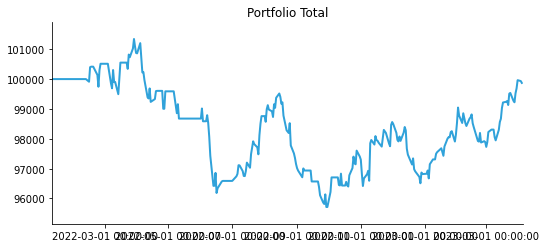

In [108]:
data2['Portfolio Total'].hvplot()

In [92]:
signals.head()

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,STOCHd_14_3_3,CUMLOGRET_1,LOGRET_1,CUMPCTRET_1,PCTRET_1,performance_signal,SMA_signal,MACD_signal,BB_signal,model_signal
2022-01-10,70.232000,70.940000,69.724000,70.838001,69.840230,5811250.0,73.507654,72.544916,-0.668295,-0.324864,...,10.631973,0.358140,-0.001065,0.430666,-0.001065,0,1,0,1,0.0
2022-01-11,70.724000,71.450000,70.432001,71.367999,70.365269,4558580.0,73.394754,72.547756,-0.696819,-0.282710,...,14.385854,0.365594,0.007454,0.441370,0.007482,1,1,0,0,0.0
2022-01-12,71.769999,72.073000,71.416998,71.652001,70.646622,7299710.0,73.300987,72.547486,-0.688570,-0.219569,...,23.559157,0.369566,0.003972,0.447106,0.003979,1,1,0,0,0.0
2022-01-13,71.867501,72.048001,70.506700,70.680999,69.685044,5039770.0,73.194120,72.533366,-0.751719,-0.226175,...,29.786510,0.355921,-0.013644,0.427495,-0.013552,0,1,0,0,0.0
2022-01-14,70.370000,71.029000,70.300001,70.871999,69.874270,3985700.0,73.081420,72.522216,-0.777392,-0.201478,...,31.949750,0.358620,0.002699,0.431353,0.002702,1,1,0,0,0.0


In [93]:
df = af.create_portfolio_performance_data(signals, 'model_signal', 100000,500)

In [101]:
df.dropna(inplace=True)
df

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,MACD_signal,BB_signal,model_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2022-01-11,70.724000,71.450000,70.432001,71.367999,70.365269,4558580.0,73.394754,72.547756,-0.696819,-0.282710,...,0,0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.000000
2022-01-12,71.769999,72.073000,71.416998,71.652001,70.646622,7299710.0,73.300987,72.547486,-0.688570,-0.219569,...,0,0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.000000
2022-01-13,71.867501,72.048001,70.506700,70.680999,69.685044,5039770.0,73.194120,72.533366,-0.751719,-0.226175,...,0,0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.000000
2022-01-14,70.370000,71.029000,70.300001,70.871999,69.874270,3985700.0,73.081420,72.522216,-0.777392,-0.201478,...,0,0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.000000
2022-01-18,70.138002,70.378002,69.567000,69.715000,68.729720,5755540.0,72.958420,72.501156,-0.880943,-0.244023,...,0,0,0.0,0.0,0.0,0.000000,100000.000000,100000.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-29,62.036002,62.443001,61.947001,62.269000,62.225869,3264470.0,60.289134,58.788742,0.699343,0.116783,...,1,0,1.0,500.0,0.0,31134.499836,68391.252184,99525.752020,0.003049,-0.004742
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.553914,2644460.0,60.349767,58.862872,0.735721,0.122529,...,1,0,1.0,500.0,0.0,31298.500729,68391.252184,99689.752913,0.001648,-0.003102
2023-03-31,62.564499,63.202998,62.499998,63.144998,63.101796,2914240.0,60.448334,58.937388,0.799553,0.149089,...,1,0,1.0,500.0,0.0,31572.498894,68391.252184,99963.751078,0.002749,-0.000362
2023-04-03,62.863999,63.174999,62.645000,63.086001,63.086001,5312600.0,60.553500,59.008498,0.835746,0.148225,...,1,0,1.0,500.0,0.0,31543.000507,68391.252184,99934.252691,-0.000295,-0.000657


In [95]:
df[df['model_signal'] != 0]

,open,high,low,close,adjclose,volume,SMA_30,SMA_100,MACD_12_26_9,MACDh_12_26_9,...,MACD_signal,BB_signal,model_signal,Position,Entry/Exit Position,Portfolio Holdings,Portfolio Cash,Portfolio Total,Portfolio Daily Returns,Portfolio Cumulative Returns
2022-02-11,68.872498,69.202001,67.516000,67.888000,66.957387,6920230.0,69.817457,71.981408,-0.709302,0.150243,...,1,0,1.0,500.0,500.0,33943.999958,66056.000042,100000.000000,0.000000,0.000000
2022-02-14,67.665999,68.101999,67.244998,67.710999,66.783342,8371030.0,69.637390,71.951918,-0.753913,0.084506,...,1,0,1.0,500.0,0.0,33855.499554,66056.000042,99911.499596,-0.000885,-0.000885
2022-02-15,68.291999,68.727001,68.142999,68.684002,67.746746,5562120.0,69.482990,71.928598,-0.702654,0.108612,...,1,0,1.0,500.0,0.0,34342.000771,66056.000042,100398.000813,0.004869,0.003980
2022-02-18,67.710999,67.812999,66.924002,67.258001,66.332275,4609080.0,69.068823,71.858538,-0.747378,0.012172,...,1,0,1.0,500.0,500.0,33629.000282,66787.000370,100416.000652,0.000000,0.004160
2022-02-22,66.580998,67.261000,66.265000,66.704000,65.784049,5657890.0,68.928507,71.833308,-0.823605,-0.051245,...,0,0,1.0,500.0,0.0,33352.000046,66787.000370,100139.000416,-0.002759,0.001390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-30,62.498999,62.683999,62.284001,62.597001,62.553914,2644460.0,60.349767,58.862872,0.735721,0.122529,...,1,0,1.0,500.0,0.0,31298.500729,68391.252184,99689.752913,0.001648,-0.003102
2023-03-31,62.564499,63.202998,62.499998,63.144998,63.101796,2914240.0,60.448334,58.937388,0.799553,0.149089,...,1,0,1.0,500.0,0.0,31572.498894,68391.252184,99963.751078,0.002749,-0.000362
2023-04-03,62.863999,63.174999,62.645000,63.086001,63.086001,5312600.0,60.553500,59.008498,0.835746,0.148225,...,1,0,1.0,500.0,0.0,31543.000507,68391.252184,99934.252691,-0.000295,-0.000657
2023-04-04,62.999001,63.307998,62.644001,62.960001,62.960001,3637960.0,60.685700,59.076084,0.844526,0.125605,...,1,0,1.0,500.0,0.0,31480.000448,68391.252184,99871.252632,-0.000630,-0.001287


:Curve   [index]   (Portfolio Total)
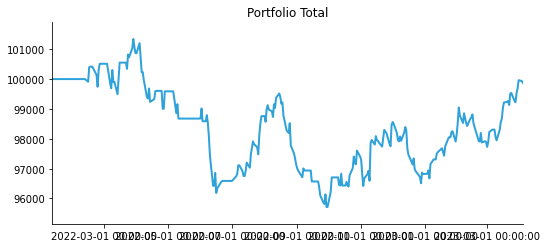

In [100]:
df['Portfolio Total'].hvplot()